In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [29]:
df.shape

(90, 9)

In [30]:
df.columns = ['L_CORE','L_SURF','L_O2','L_BP','SURF_STBL','CORE_STBL','BP_STBL','COMFORT','DECISION']
df.head()

#Preprocessing: Handling categorical data
#It is easier for us to define and handle each row of categorical data 

,L_CORE,L_SURF,L_O2,L_BP,SURF_STBL,CORE_STBL,BP_STBL,COMFORT,DECISION
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [31]:
L_CORE_mapping = {'low': 0,'mid': 1,'high': 2}
L_SURF_mapping = {'low': 0,'mid': 1,'high': 2}
L_O2_mapping = {'poor': 0,'fair': 1,'good': 2,'excellent':3}
L_BP_mapping = {'low': 0,'mid': 1,'high': 2}
SURF_STBL_mapping = {'stable': 2,'mod-stable': 1,'unstable': 0}
CORE_STBL_mapping = {'stable': 2,'mod-stable': 1,'unstable': 0}
BP_STBL_mapping = {'stable': 2,'mod-stable': 1,'unstable': 0}

In [32]:
df['L_CORE'] = df['L_CORE'].map(L_CORE_mapping)
df['L_SURF'] = df['L_SURF'].map(L_SURF_mapping)
df['L_O2'] = df['L_O2'].map(L_O2_mapping)
df['L_BP'] = df['L_BP'].map(L_BP_mapping)
df['SURF_STBL'] = df['SURF_STBL'].map(SURF_STBL_mapping)
df['CORE_STBL'] = df['CORE_STBL'].map(CORE_STBL_mapping)
df['BP_STBL'] = df['BP_STBL'].map(BP_STBL_mapping)

#Preprocessing: Mapping ordinal features
#Here we could convert the categorical data to integers and define the map 

In [33]:
df

,L_CORE,L_SURF,L_O2,L_BP,SURF_STBL,CORE_STBL,BP_STBL,COMFORT,DECISION
0,1,0,3,1,2,2,2,15,A
1,1,2,3,2,2,2,2,10,S
2,2,0,3,2,2,2,1,10,A
3,1,0,2,2,2,0,1,15,A
4,1,1,3,2,2,2,2,10,A
5,2,0,2,1,2,2,0,15,S
6,1,0,3,2,2,2,1,05,S
7,2,1,3,1,0,0,2,10,S
8,1,2,2,1,2,2,2,10,S
9,1,0,3,1,0,2,1,10,S


In [34]:
df['COMFORT'] = pd.to_numeric(df['COMFORT'], errors='coerce')


#Converting strings to integers

In [35]:
df

,L_CORE,L_SURF,L_O2,L_BP,SURF_STBL,CORE_STBL,BP_STBL,COMFORT,DECISION
0,1,0,3,1,2,2,2,15.0,A
1,1,2,3,2,2,2,2,10.0,S
2,2,0,3,2,2,2,1,10.0,A
3,1,0,2,2,2,0,1,15.0,A
4,1,1,3,2,2,2,2,10.0,A
5,2,0,2,1,2,2,0,15.0,S
6,1,0,3,2,2,2,1,5.0,S
7,2,1,3,1,0,0,2,10.0,S
8,1,2,2,1,2,2,2,10.0,S
9,1,0,3,1,0,2,1,10.0,S


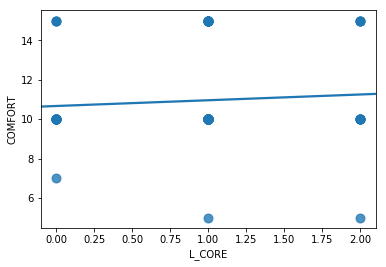

In [36]:
import seaborn as sns
sns.regplot(x="L_CORE", y="COMFORT", data=df, ci=None, scatter_kws={"s":80})

#This plot reveals that L_CORE(patients internal temerature in C) marginally positively correlated to the COMFORT

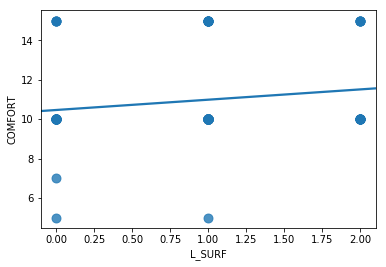

In [37]:
sns.regplot(x="L_SURF", y="COMFORT", data=df, ci=None, scatter_kws={"s":80})

#This plot reveals that L_SURF(patients surface temerature in C) marginally positively correlated to the COMFORT

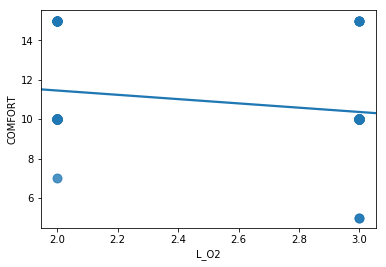

In [38]:
sns.regplot(x="L_O2", y="COMFORT", data=df, ci=None, scatter_kws={"s":80})

#This plot reveals that L_O2(oxygen saturation in %) marginally negatively correlated to the COMFORT

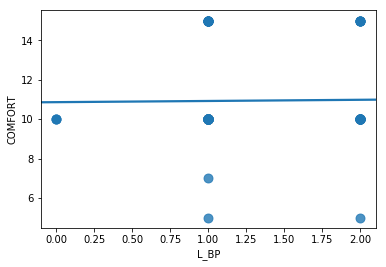

In [39]:
sns.regplot(x="L_BP", y="COMFORT", data=df, ci=None, scatter_kws={"s":80})

#This plot reveals that L_BP(last measurement of blood presure) uncorrelated to the COMFORT

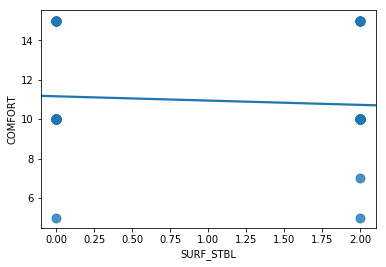

In [40]:
sns.regplot(x="SURF_STBL", y="COMFORT", data=df, ci=None, scatter_kws={"s":80})

#This plot reveals that SURF_STBL(stability of patients's surface temperature) marginally negatively correlated to the COMFORT

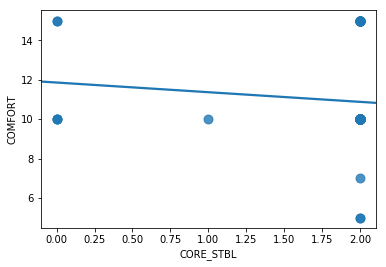

In [41]:
sns.regplot(x="CORE_STBL", y="COMFORT", data=df, ci=None, scatter_kws={"s":80})

#This plot reveals that CORE_STBL(stability of patients's core temperature) marginally negatively correlated to the COMFORT

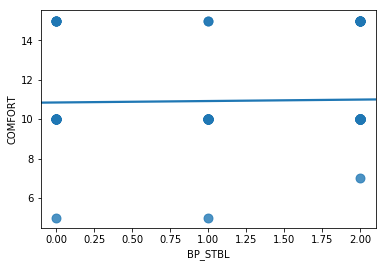

In [42]:
sns.regplot(x="BP_STBL", y="COMFORT", data=df, ci=None, scatter_kws={"s":80})

#This plot reveals that BP_STBL(stabiltiy of patient's blood pressure) uncorrelated to the COMFORT

In [43]:
df = df.ix[:,0:8]
df

/Users/liyunzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,L_CORE,L_SURF,L_O2,L_BP,SURF_STBL,CORE_STBL,BP_STBL,COMFORT
0,1,0,3,1,2,2,2,15.0
1,1,2,3,2,2,2,2,10.0
2,2,0,3,2,2,2,1,10.0
3,1,0,2,2,2,0,1,15.0
4,1,1,3,2,2,2,2,10.0
5,2,0,2,1,2,2,0,15.0
6,1,0,3,2,2,2,1,5.0
7,2,1,3,1,0,0,2,10.0
8,1,2,2,1,2,2,2,10.0
9,1,0,3,1,0,2,1,10.0


In [44]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

#Preprocessing: Dealing with missing data——Imputing missing values
#This preprocessing step is needed because the missing data need to be handled carefully, 
#and if we just remove the missing data, we might lose too much valuable data.

array([[ 1.        ,  0.        ,  3.        ,  1.        ,  2.        ,
         2.        ,  2.        , 15.        ],
       [ 1.        ,  2.        ,  3.        ,  2.        ,  2.        ,
         2.        ,  2.        , 10.        ],
       [ 2.        ,  0.        ,  3.        ,  2.        ,  2.        ,
         2.        ,  1.        , 10.        ],
       [ 1.        ,  0.        ,  2.        ,  2.        ,  2.        ,
         0.        ,  1.        , 15.        ],
       [ 1.        ,  1.        ,  3.        ,  2.        ,  2.        ,
         2.        ,  2.        , 10.        ],
       [ 2.        ,  0.        ,  2.        ,  1.        ,  2.        ,
         2.        ,  0.        , 15.        ],
       [ 1.        ,  0.        ,  3.        ,  2.        ,  2.        ,
         2.        ,  1.        ,  5.        ],
       [ 2.        ,  1.        ,  3.        ,  1.        ,  0.        ,
         0.        ,  2.        , 10.        ],
       [ 1.        ,  2.        

In [45]:
df = imputed_data
df

array([[ 1.        ,  0.        ,  3.        ,  1.        ,  2.        ,
         2.        ,  2.        , 15.        ],
       [ 1.        ,  2.        ,  3.        ,  2.        ,  2.        ,
         2.        ,  2.        , 10.        ],
       [ 2.        ,  0.        ,  3.        ,  2.        ,  2.        ,
         2.        ,  1.        , 10.        ],
       [ 1.        ,  0.        ,  2.        ,  2.        ,  2.        ,
         0.        ,  1.        , 15.        ],
       [ 1.        ,  1.        ,  3.        ,  2.        ,  2.        ,
         2.        ,  2.        , 10.        ],
       [ 2.        ,  0.        ,  2.        ,  1.        ,  2.        ,
         2.        ,  0.        , 15.        ],
       [ 1.        ,  0.        ,  3.        ,  2.        ,  2.        ,
         2.        ,  1.        ,  5.        ],
       [ 2.        ,  1.        ,  3.        ,  1.        ,  0.        ,
         0.        ,  2.        , 10.        ],
       [ 1.        ,  2.        

In [46]:
#Preprocessing: standardization
#Reason: Not only important if we are comparing measurements that have different units, 
#but it is also a general requirement for many machine learning algorithms.

from sklearn import datasets
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

In [47]:
sc = preprocessing.StandardScaler()
sc.fit(df)
X_train_transformed = sc.transform(df)

In [48]:
X_train_transformed

array([[ 0.11250879, -1.34516637,  1.04547753, -0.57035183,  1.        ,
         0.28497536,  0.88891945,  1.80117201],
       [ 0.11250879,  1.60763785,  1.04547753,  1.33082093,  1.        ,
         0.28497536,  0.88891945, -0.41840256],
       [ 1.80014064, -1.34516637,  1.04547753,  1.33082093,  1.        ,
         0.28497536, -0.30515145, -0.41840256],
       [ 0.11250879, -1.34516637, -0.95650071,  1.33082093,  1.        ,
        -3.66083733, -0.30515145,  1.80117201],
       [ 0.11250879,  0.13123574,  1.04547753,  1.33082093,  1.        ,
         0.28497536,  0.88891945, -0.41840256],
       [ 1.80014064, -1.34516637, -0.95650071, -0.57035183,  1.        ,
         0.28497536, -1.49922235,  1.80117201],
       [ 0.11250879, -1.34516637,  1.04547753,  1.33082093,  1.        ,
         0.28497536, -0.30515145, -2.63797714],
       [ 1.80014064,  0.13123574,  1.04547753, -0.57035183, -1.        ,
        -3.66083733,  0.88891945, -0.41840256],
       [ 0.11250879,  1.60763785